In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt 
import numpy as np
import cv2


Using TensorFlow backend.


In [2]:
mnist=tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data() 


In [3]:
print("Training Data Shape {}".format(x_train.shape))
print("Training Labels Shape {}".format(y_train.shape))
print("Testing Data Shape {}".format(x_test.shape))
print("Testing Labels Shape {}".format(y_test.shape))



Training Data Shape (60000, 28, 28)
Training Labels Shape (60000,)
Testing Data Shape (10000, 28, 28)
Testing Labels Shape (10000,)


In [4]:
print("Sample Training Label is {}".format(y_train[0:5]))

Sample Training Label is [5 0 4 1 9]


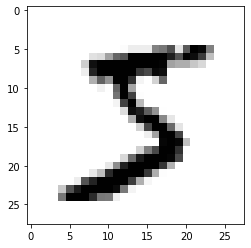

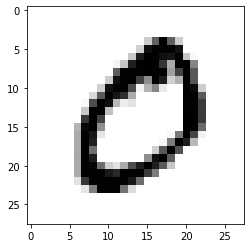

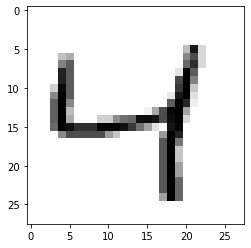

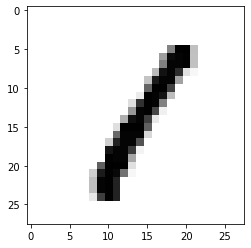

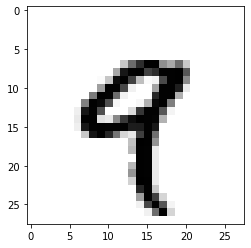

In [6]:
for i in range(5):
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.show()

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [8]:
print("Training Data after normalizing {}".format(x_train[0]))
print("Testing Data after normalizing {}".format(x_test[0]))


Training Data after normalizing [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0

In [12]:
model =tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # softmax for probability distribution
model.compile(optimizer="adam", loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.fit(x_train , y_train , epochs =3 )
predictions = model.predict([x_test])


Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2681 - accuracy: 0.9223
Epoch 2/3
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1073 - accuracy: 0.9674
Epoch 3/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0718 - accuracy: 0.9779


In [29]:
print("Probability for multi class classification ")
predictions[6]


Probability for multi class classification 


array([2.3438359e-08, 1.1929238e-06, 3.4747313e-06, 3.3111344e-06,
       9.9889588e-01, 2.6393654e-06, 8.0581849e-08, 2.8503408e-05,
       7.6624047e-04, 2.9868225e-04], dtype=float32)

In [30]:
print(np.argmax(predictions[6]))


4


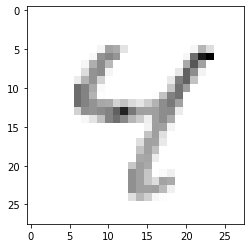

In [31]:
plt.imshow(x_test[6], cmap = plt.cm.binary)
plt.show()


In [32]:
val_loss , val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)


10000/10000 [==============================] - 0s 44us/sample - loss: 0.0925 - accuracy: 0.9724
0.09251802606862039 0.9724


In [33]:
predictions = model.predict([x_test])


(304, 215)


27018


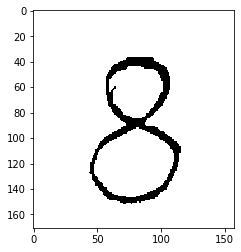

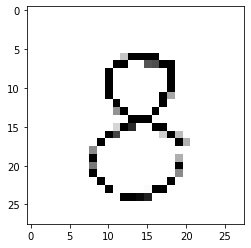

Probability Distribution for 0 0.0008407621
Probability Distribution for 1 0.00021749688
Probability Distribution for 2 0.0013174372
Probability Distribution for 3 0.005976359
Probability Distribution for 4 0.00065321947
Probability Distribution for 5 0.00029789205
Probability Distribution for 6 5.290742e-05
Probability Distribution for 7 0.00010144144
Probability Distribution for 8 0.91398925
Probability Distribution for 9 0.0765532
The Predicted Value is 8


In [81]:
from PIL import Image
user_test =r'C:\Users\91708\Desktop\mnist\opencv5.png'
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.png")
bw
img_array = cv2.imread("bw_image.png", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)
predicted = model.predict([[user_test]])
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)
print("The Predicted Value is",np.argmax(predicted[0]))